# **AI Job 2025: Prediction Model Pipeline**

#3 Project: Regression problem.


## **Purpose**

This project will try to discover some critical findings related to AI field, in which its rapid development can change in the near future. However, this can serve as a point in time for those that:
- Curious about the AI fields, with relevant features that can describe how the field is going.
- Businesses aiming to understand what are the possible job roles, its expected salaries, or even predict salary for a particular role.
- Or those such as myself, practicing Data Science/Machine Learning skills.

For last steps of this project, I will build a model pipeline that predicts an AI job's expected salary.

## **About this dataset**

The dataset contains information about AI and machine learning job positions, salaries, and market trends across different countries, along with experience levels, and company sizes. It consists of over 15,000 job posting scraped by the author from multiple job sites.

Note that this dataset is from: AI Job Market Analysis Dataset 2025. Retrieved from Kaggle.com

#### **Key Features**
* 15,000+ Job listing
* Salary Data in multiple currency
* Experience level categorization (Entry, Mid, Senior, Executive)
* Company size impact analysis
* Remote work trends and patterns
* Skills demand analysis
* Geographic salary variations
* Time-series data showing market evolution

| Column                  | Description                                           | Type                                                 |
|-------------------------|-------------------------------------------------------|------------------------------------------------------|
| `job_id`                | Unique identifier for each job posting                | String                                               |
| `job_title`             | Standardized job title                                | String                                               |
| `salary_usd`            | Annual salary in USD                                  | Integer                                              |
| `salary_currency`       | Original salary currency                              | String                                               |
| `salary_local`          | Salary in local currency                              | Float                                                |
| `experience_level`      | EN (Entry), MI (Mid), SE (Senior), EX (Executive)     | String                                               |
| `employment_type`       | FT (Full-time), PT (Part-time), CT (Contract), FL (Freelance) | String                                      |
| `job_category`          | ML Engineer, Data Scientist, AI Researcher, etc.      | String                                               |
| `company_location`      | Country where company is located                      | String                                               |
| `company_size`          | S (Small <50), M (Medium 50-250), L (Large >250)      | String                                               |
| `employee_residence`    | Country where employee resides                        | String                                               |
| `remote_ratio`          | 0 (No remote), 50 (Hybrid), 100 (Fully remote)        | Integer                                              |
| `required_skills`       | Top 5 required skills (comma-separated)               | String                                               |
| `education_required`    | Minimum education requirement                         | String                                               |
| `years_experience`      | Required years of experience                          | Integer                                              |
| `industry`              | Industry sector of the company                        | String                                               |
| `posting_date`          | Date when job was posted                              | Date                                                 |
| `application_deadline` | Application deadline                                  | Date                                                 |
| `job_description_length`| Character count of job description                    | Integer                                              |
| `benefits_score`        | Numerical score of benefits package (1-10)            | Float                                                |


In [353]:
# Importing libraries

# Data Handling
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme()
from wordcloud import WordCloud
from scipy.stats import chi2_contingency

# Data Preprocess
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MultiLabelBinarizer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

# Modeling
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# Metrics
from sklearn.metrics import r2_score

# Warning
import warnings
warnings.filterwarnings('ignore')

In [354]:
data = pd.read_csv('ai_job_dataset.csv')
df = data.copy()
df.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


## 1. Data Overview

In [355]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

In [356]:
df.describe()

,salary_usd,remote_ratio,years_experience,job_description_length,benefits_score
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,115348.965133,49.483333,6.253200,1503.314733,7.504273
std,60260.940438,40.812712,5.545768,576.127083,1.450870
min,32519.000000,0.000000,0.000000,500.000000,5.000000
25%,70179.750000,0.000000,2.000000,1003.750000,6.200000
50%,99705.000000,50.000000,5.000000,1512.000000,7.500000
75%,146408.500000,100.000000,10.000000,2000.000000,8.800000
max,399095.000000,100.000000,19.000000,2499.000000,10.000000


In [357]:
df.shape

(15000, 19)

- The Job_Id is irrelevant to further usage in model building, but I can use it later if I need to split or join based on their respective Job_ID. Hence, for now I will just leave it there.
- Quick look at the descriptive statistics, it seems there might be potential outliers in the salary_usd.

In [358]:
df.select_dtypes(include=['number']).columns

Index(['salary_usd', 'remote_ratio', 'years_experience',
       'job_description_length', 'benefits_score'],
      dtype='object')

The numeric columns are:
- salary_usd
- remote_ratio
- years_experience
- job_description_length
- benefits_score

In [359]:
df.select_dtypes(exclude=['number']).columns

Index(['job_id', 'job_title', 'salary_currency', 'experience_level',
       'employment_type', 'company_location', 'company_size',
       'employee_residence', 'required_skills', 'education_required',
       'industry', 'posting_date', 'application_deadline', 'company_name'],
      dtype='object')

The categorical columns are:
- job_id
- job_title
- salary_currency
- experience_level
- employment_type
- company_location
- company_size
- employee_residence
- required_skills
- education_required
- industry
- posting_date
- application_deadline
- company_name

In [360]:
df.isna().sum()

job_id                    0
job_title                 0
salary_usd                0
salary_currency           0
experience_level          0
employment_type           0
company_location          0
company_size              0
employee_residence        0
remote_ratio              0
required_skills           0
education_required        0
years_experience          0
industry                  0
posting_date              0
application_deadline      0
job_description_length    0
benefits_score            0
company_name              0
dtype: int64

In [361]:
df.duplicated().sum()

np.int64(0)

## 2. Data Cleaning

In [362]:
df.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


In [363]:
df['posting_date'] = pd.to_datetime(df['posting_date'])
df['application_deadline'] = pd.to_datetime(df['application_deadline'])

Data is already cleaned enough. Hence I will proceed to EDA.

## 3. EDA

In [364]:
categorical_cols = df.select_dtypes(exclude=['number', 'datetime']).columns.tolist()
categorical_cols.remove('job_id')
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

In [365]:
df['month_posting'] = df['posting_date'].dt.month
df['year_posting'] = df['posting_date'].dt.year

### Univariate Analysis

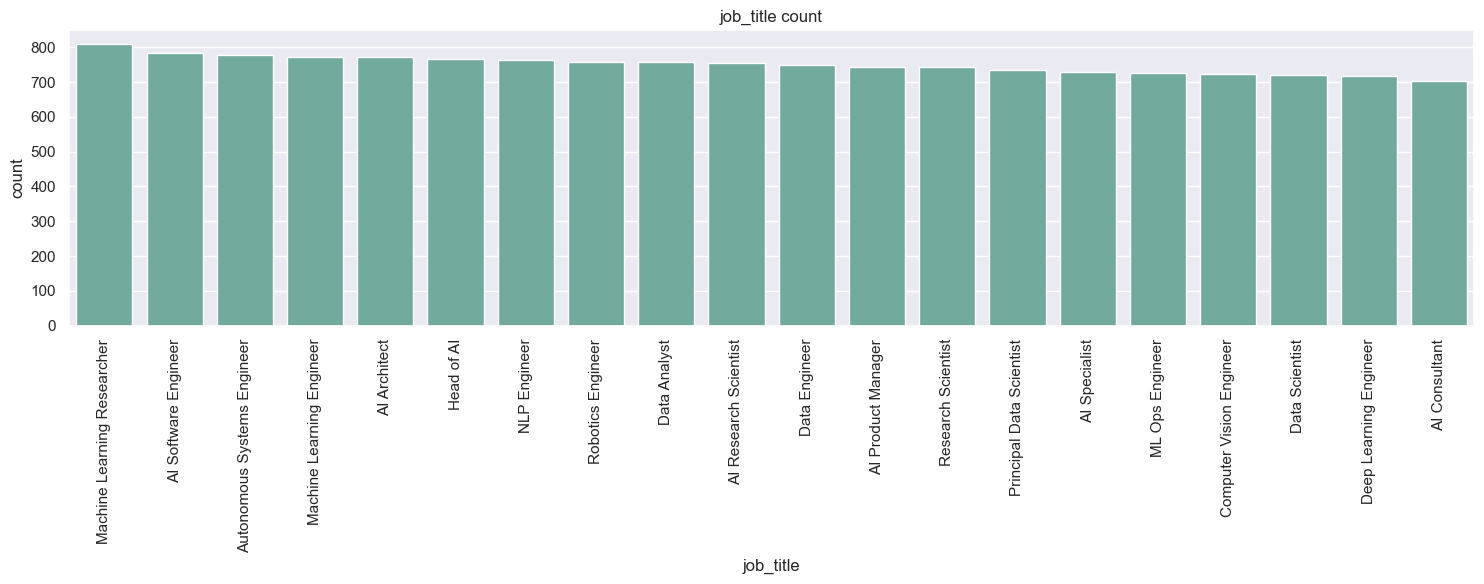

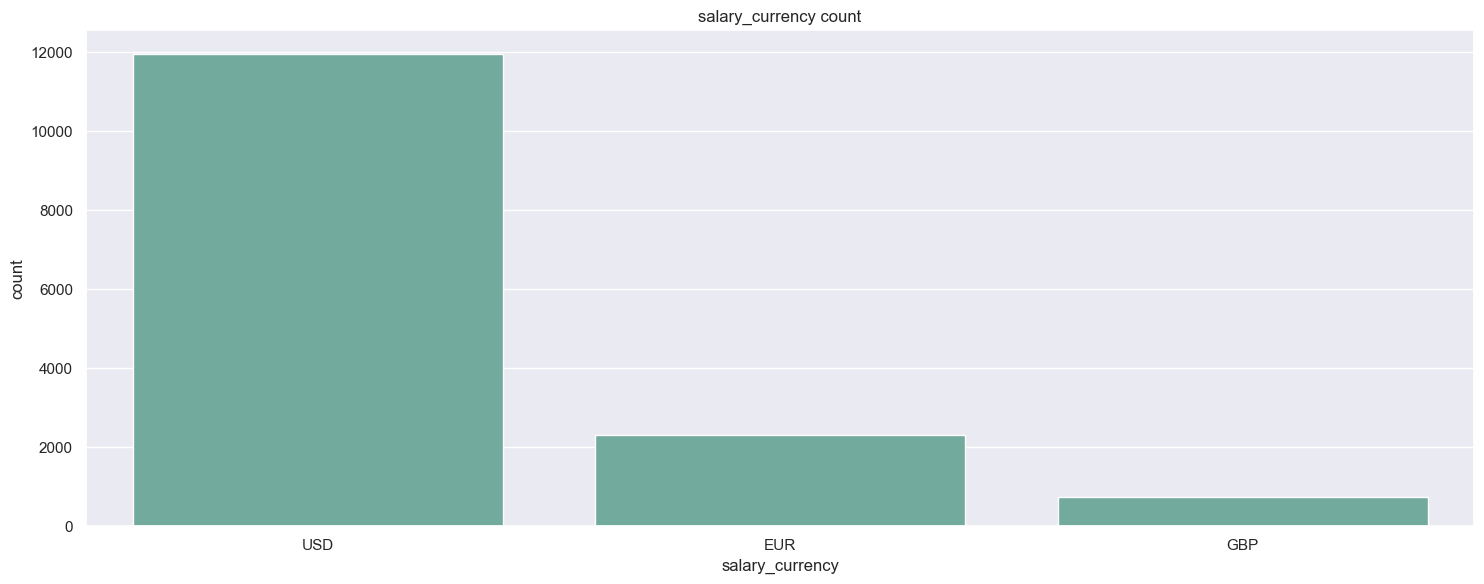

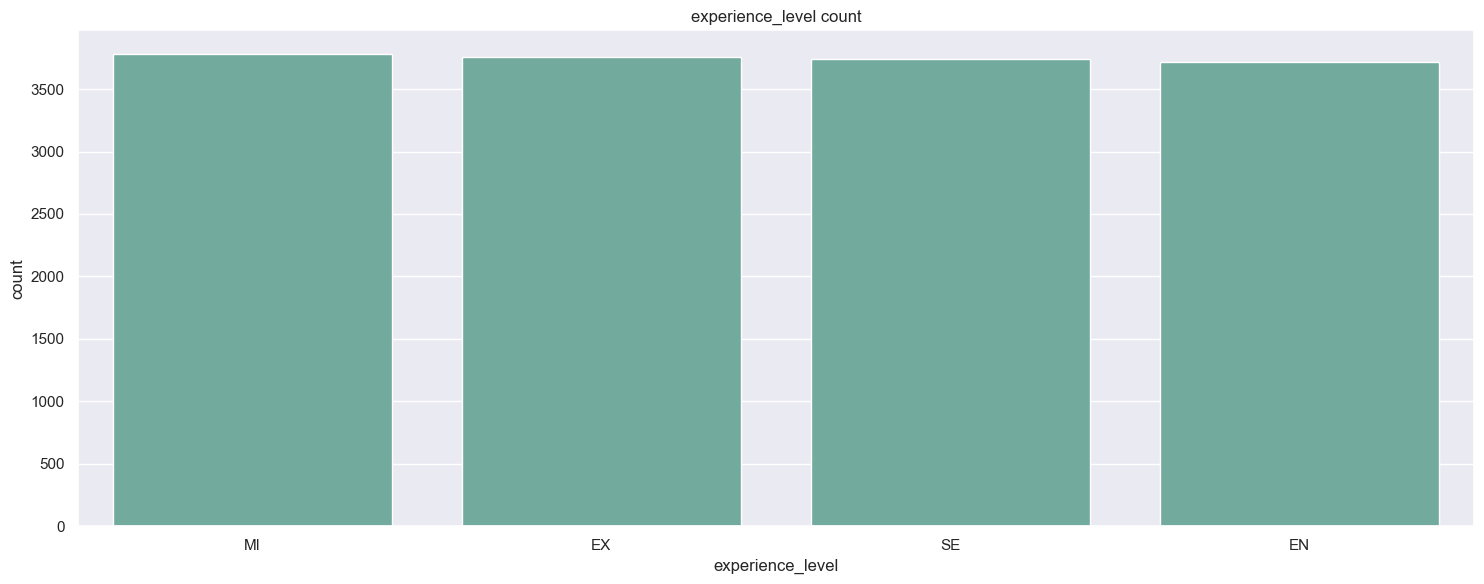

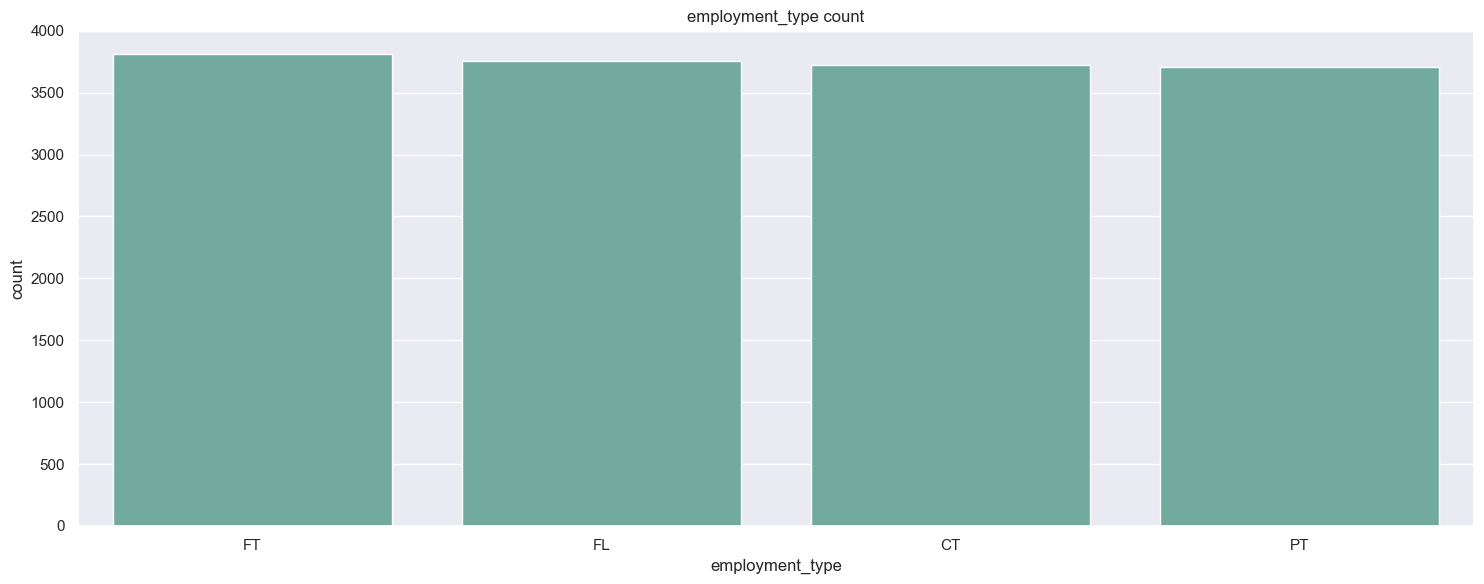

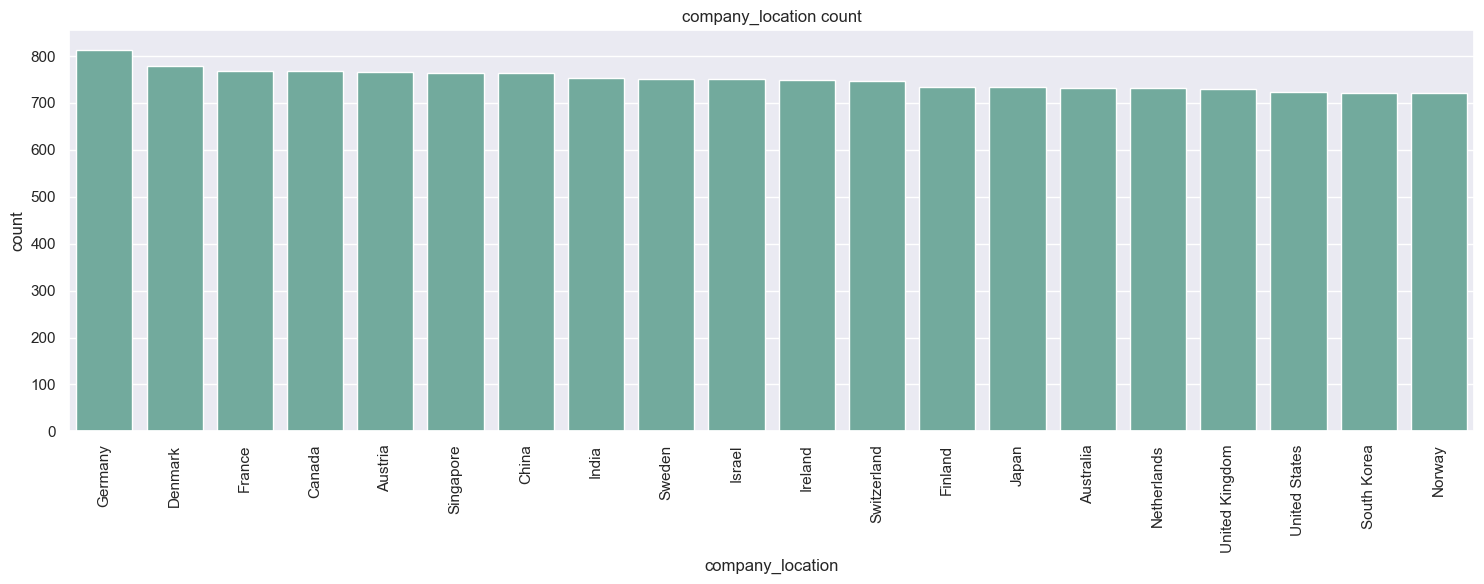

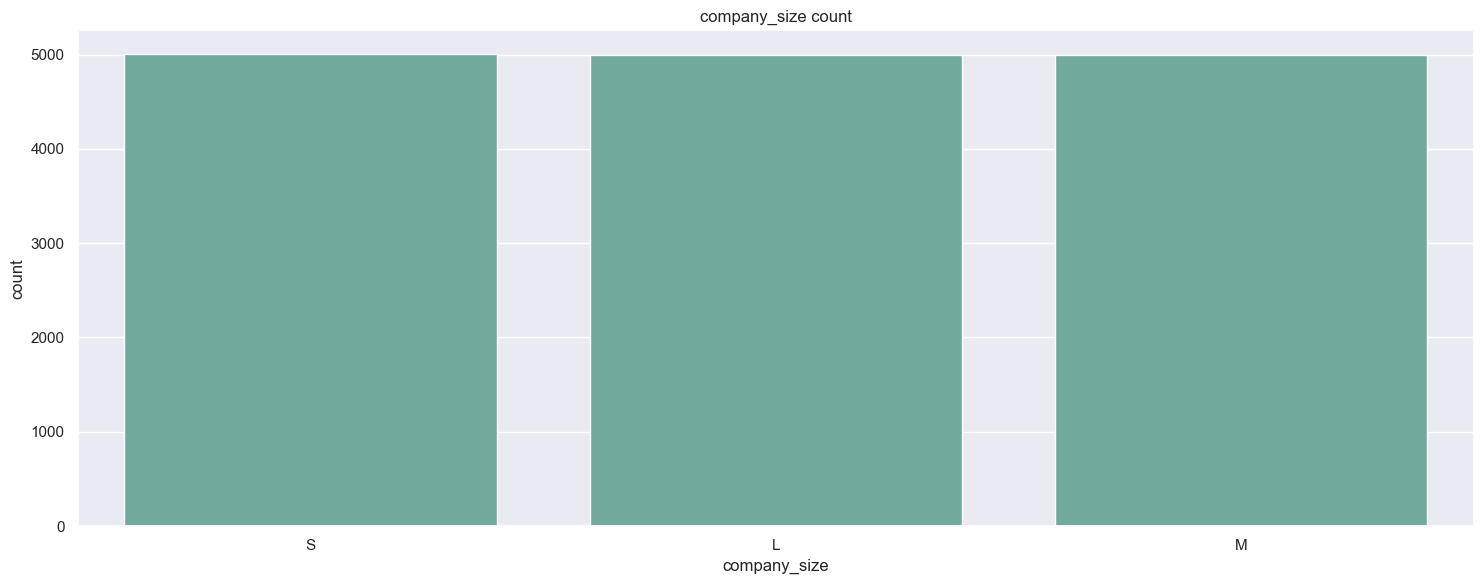

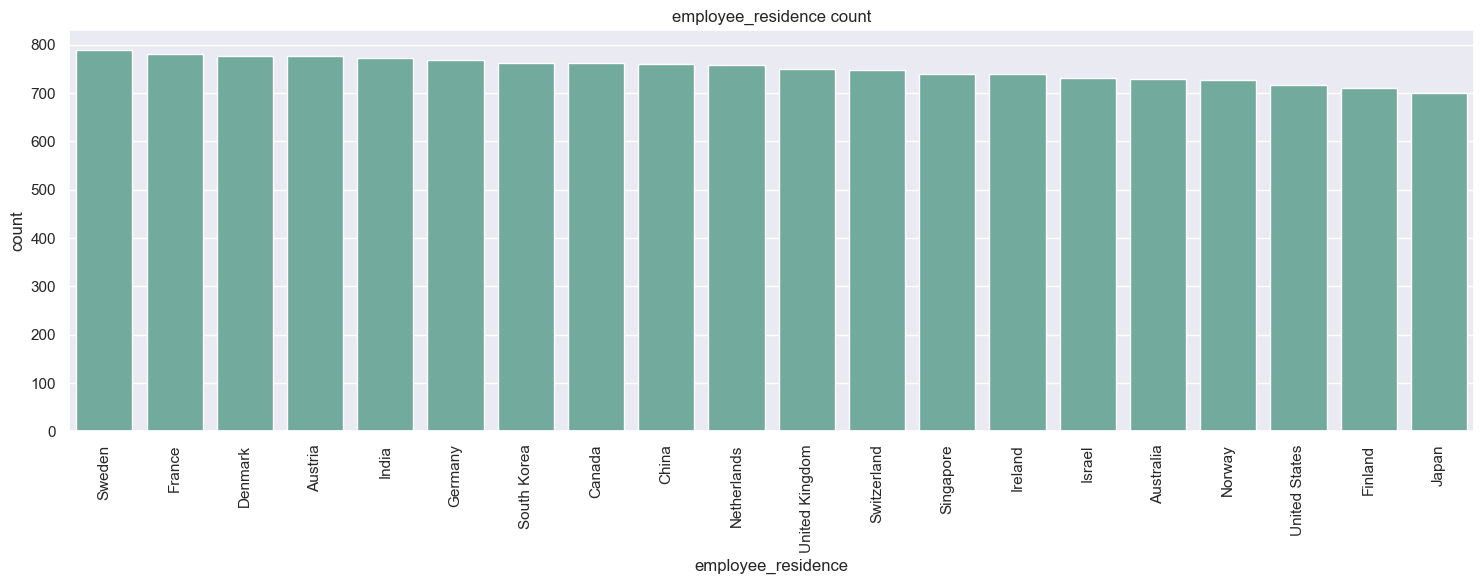

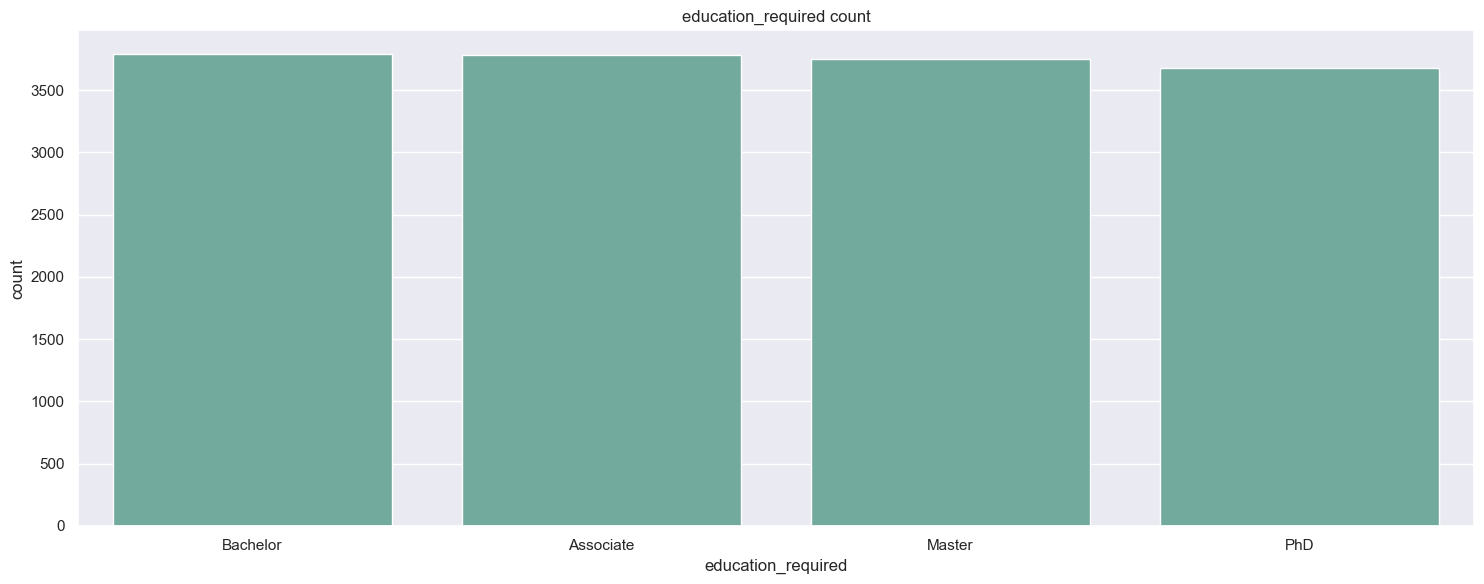

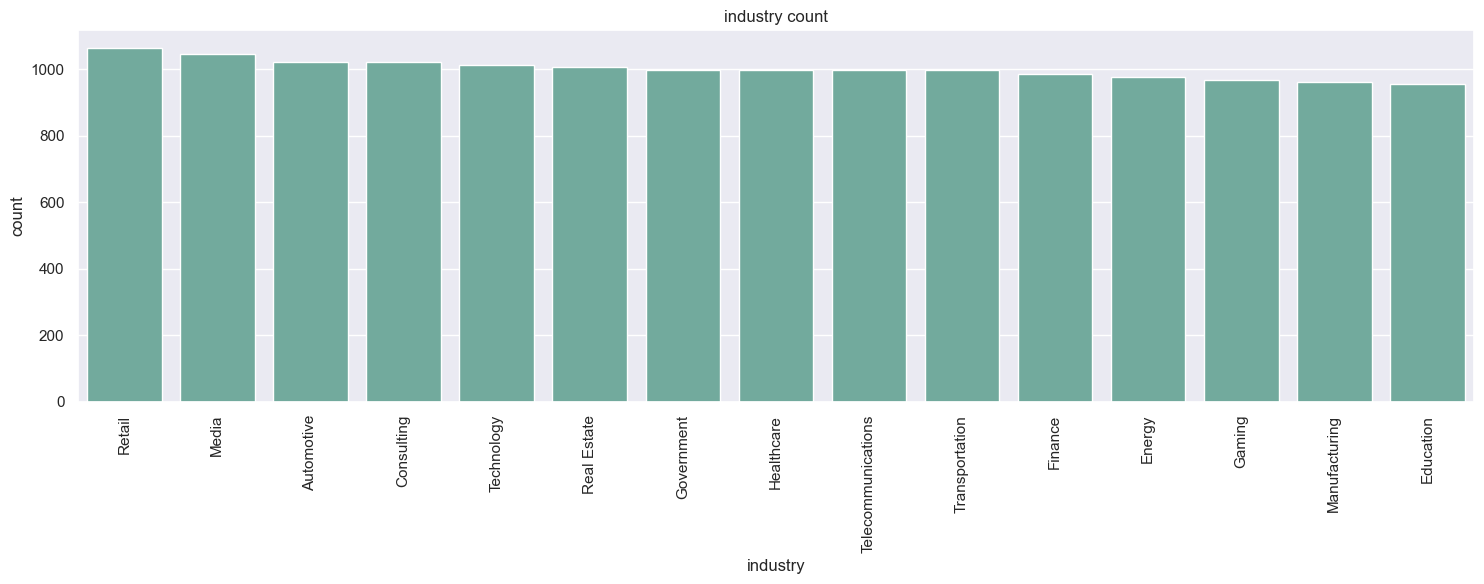

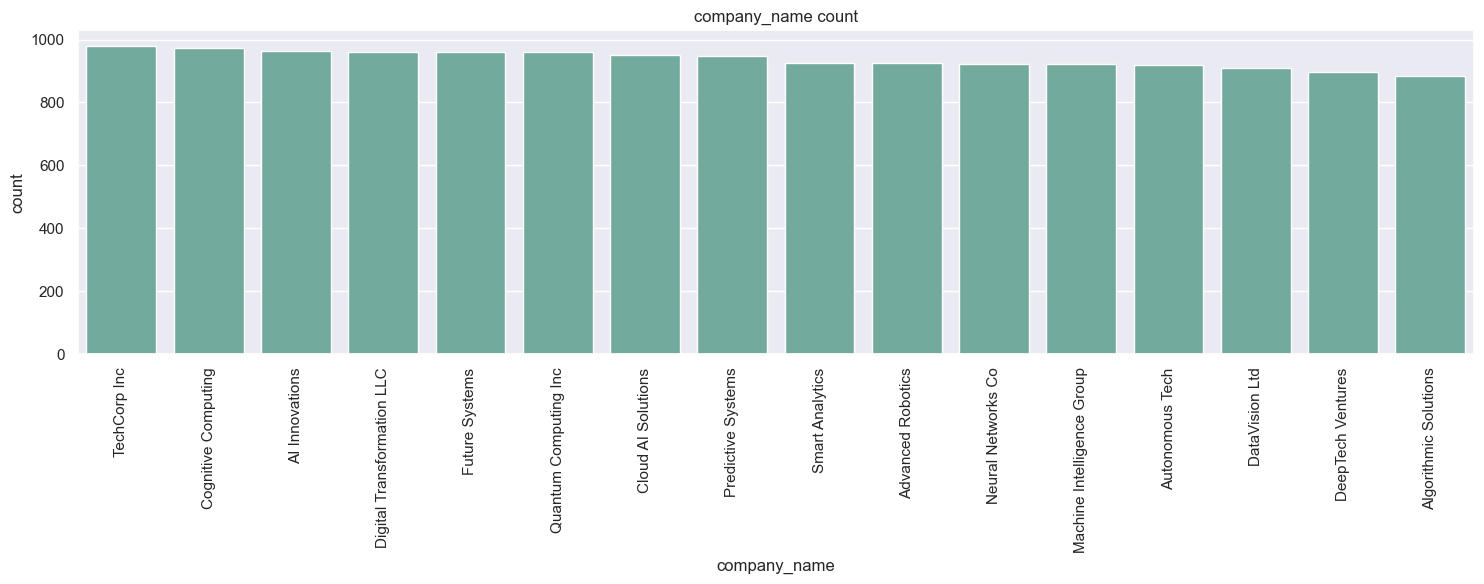

In [366]:
# Categorical univariate
for col in categorical_cols:
    if col != 'required_skills':
        if col == 'job_title' or col == 'company_location' or col == 'employee_residence' or col == 'industry' or col == 'company_name':
            plt.figure(figsize=(15,6))
            sns.countplot(data=df[categorical_cols], x=col, color='#69b3a2', order=df[categorical_cols][col].value_counts().sort_values(ascending=False).index.tolist())
            plt.title(f'{col} count')
            plt.xticks(rotation=90)
            plt.tight_layout()
        else:
            plt.figure(figsize=(15,6))
            sns.countplot(data=df[categorical_cols], x=col, color='#69b3a2', order=df[categorical_cols][col].value_counts().sort_values(ascending=False).index.tolist())
            plt.title(f'{col} count')
            plt.tight_layout()

In [367]:
df['job_title'].value_counts().sort_values(ascending=False)

job_title
Machine Learning Researcher    808
AI Software Engineer           784
Autonomous Systems Engineer    777
Machine Learning Engineer      772
AI Architect                   771
Head of AI                     765
NLP Engineer                   762
Robotics Engineer              759
Data Analyst                   759
AI Research Scientist          756
Data Engineer                  749
AI Product Manager             743
Research Scientist             742
Principal Data Scientist       734
AI Specialist                  728
ML Ops Engineer                725
Computer Vision Engineer       724
Data Scientist                 720
Deep Learning Engineer         718
AI Consultant                  704
Name: count, dtype: int64

- **Machine Learning Researcher** has the highest listing (808), follow by **AI Software Engineer** (784), **Autonomous Learning Engineer** (777), **Machine Learning Engineer** (772), and **AI Architect** (771).
- **NLP Engineer** and **Robotics Engineer**, are also popular niche, while **Deep Learning Engineer** and *Computer Vision Engineer** are on the other end of least popular niche.

For other categorical features, overall they share similar statistics per job listing:
- Company Location: Germany has the highest listing.
- Employee Residence: Sweden has the highest residence, follow by France and Denmark.
- Industry: the most popular industry in need of AI is retail, followed by Media, Automotive, Consulting, and Technology.

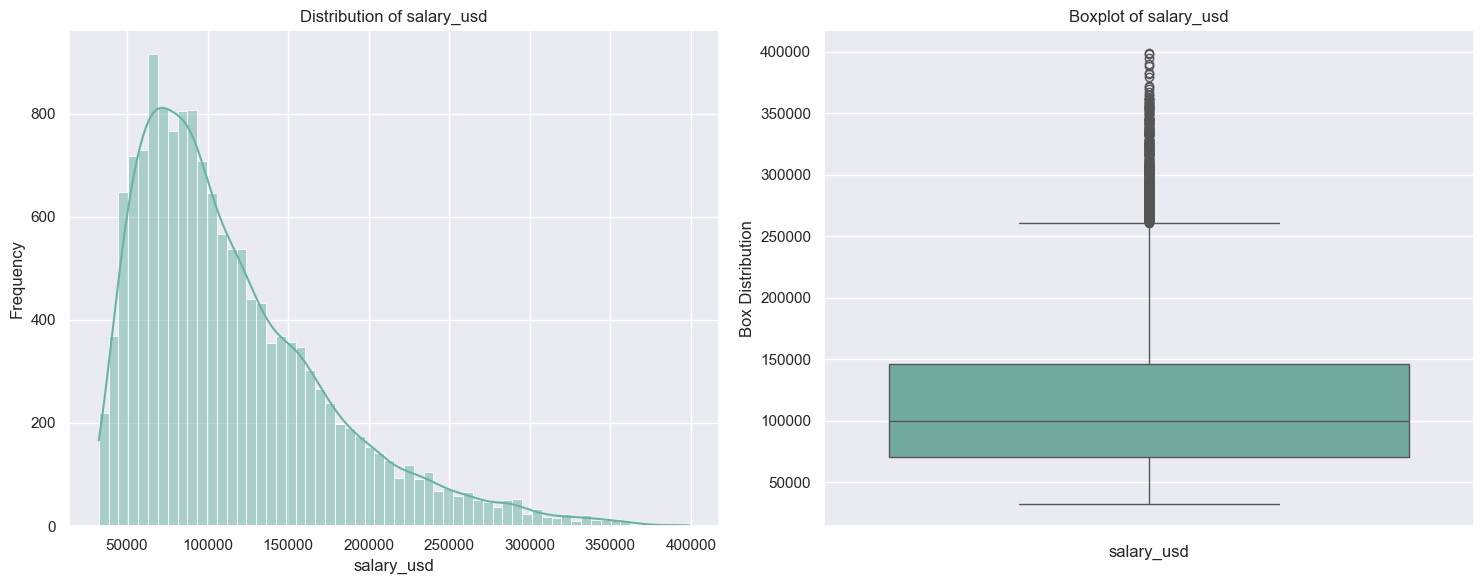

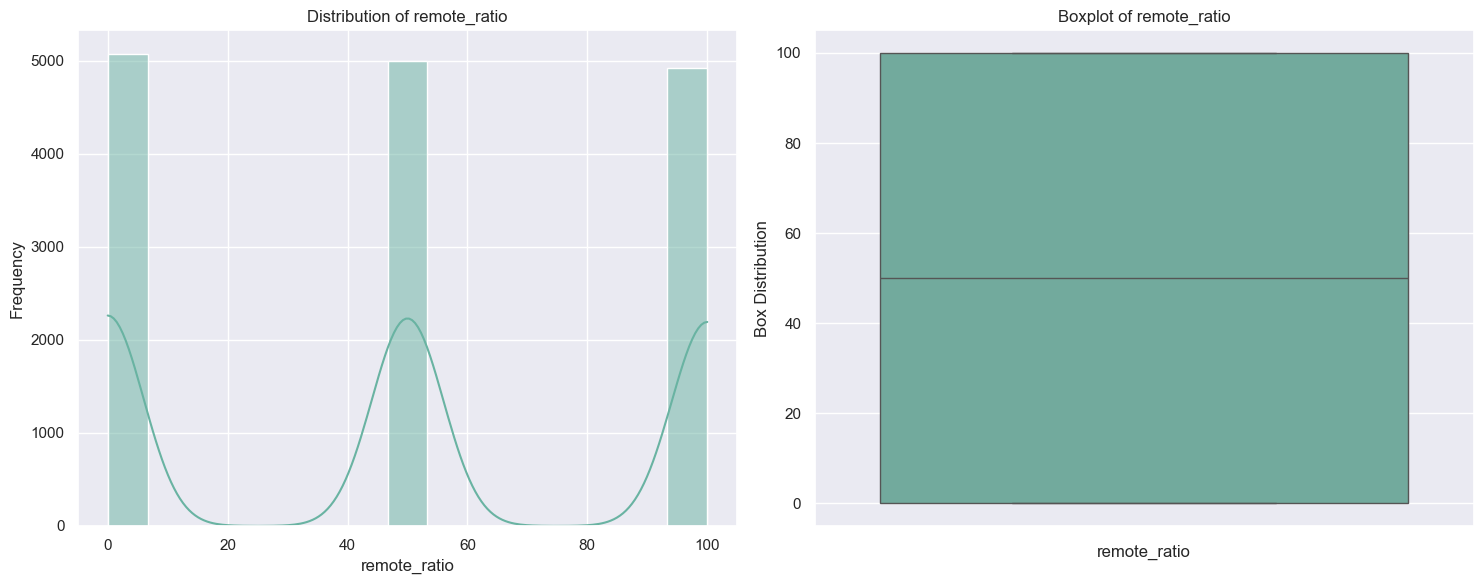

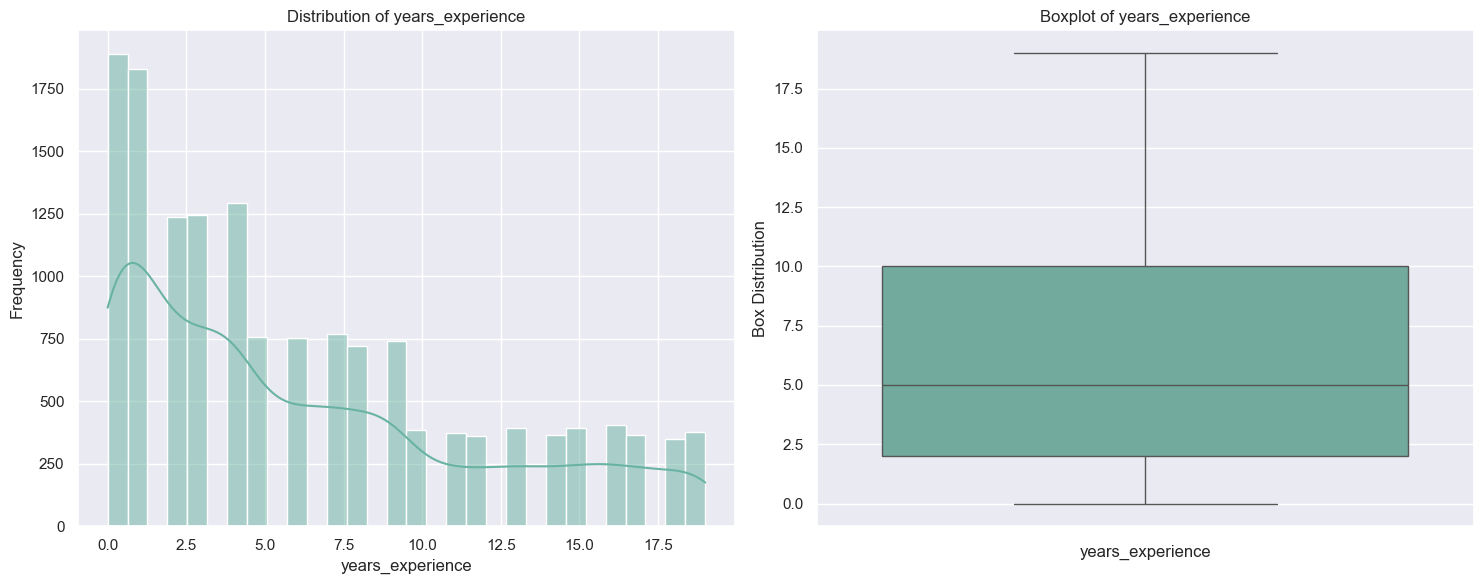

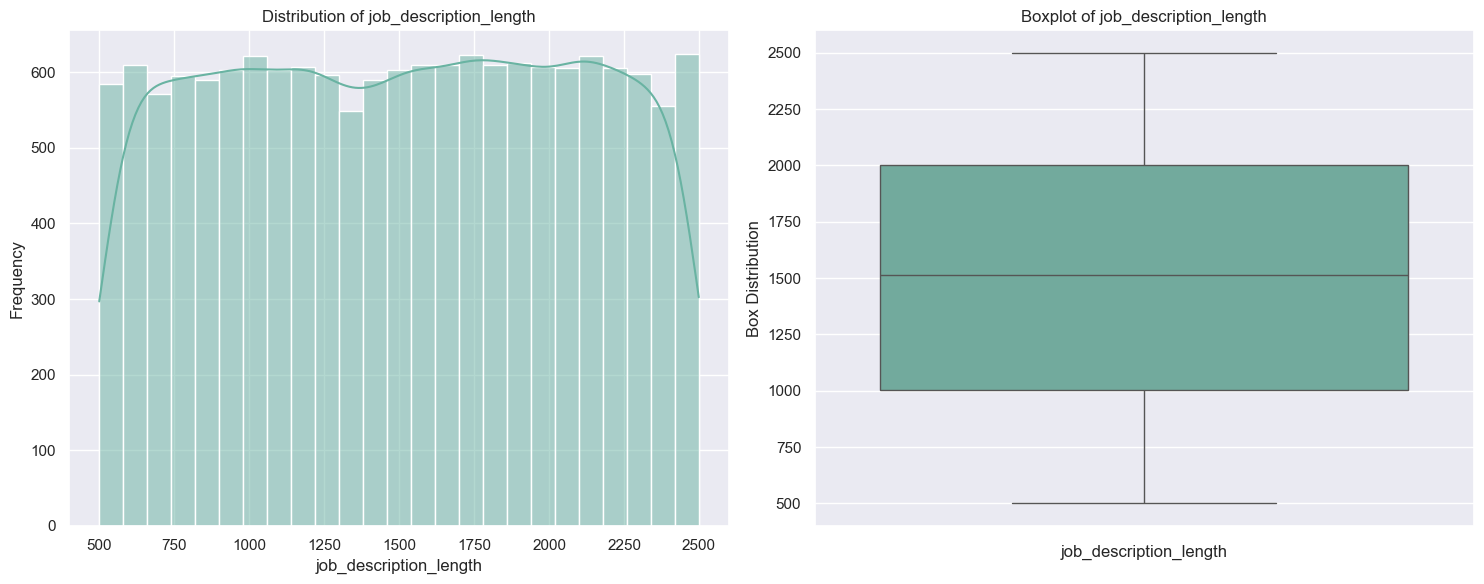

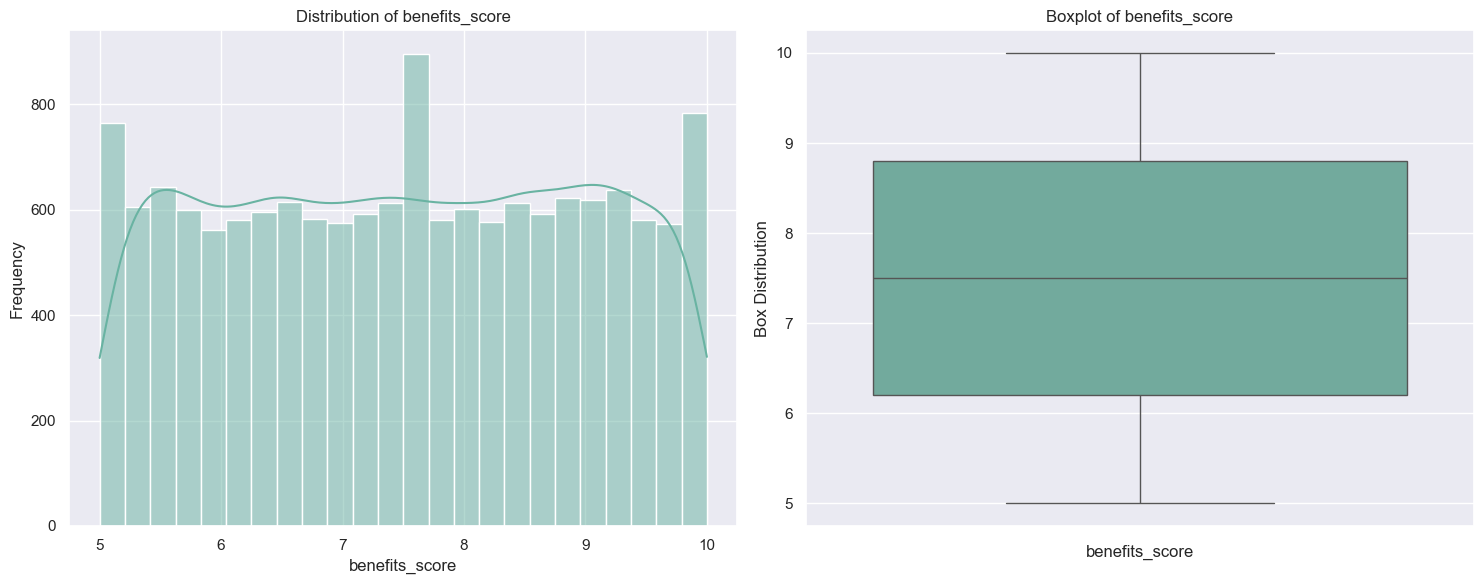

In [368]:
# Numerical Features
for col in numerical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(15,6))

    # Histplot
    sns.histplot(data=df[[col]], x=col, ax=axes[0], kde=True, color='#69b3a2')
    axes[0].set_title(f'Distribution of {col}')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Frequency')

    # Boxplot
    sns.boxplot(data=df[[col]], y=col, ax=axes[1], color='#69b3a2')
    axes[1].set_title(f'Boxplot of {col}')
    axes[1].set_xlabel(col)
    axes[1].set_ylabel('Box Distribution')

    plt.tight_layout()
    plt.show()

- Salary and Years of Experience are skewed to the right -> Hence the demand for from junior to senior to higher level tends to decrease.
- The salary might affect our model of predicting with higher values on the upper side, hence scaling it may increase model performance.

In [369]:
df['log_salary_usd'] = np.log1p(df['salary_usd'])

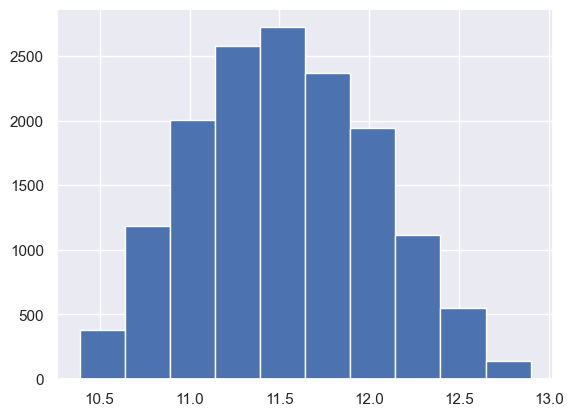

In [370]:
df['log_salary_usd'].hist()
plt.show()

### Bivariate Analysis

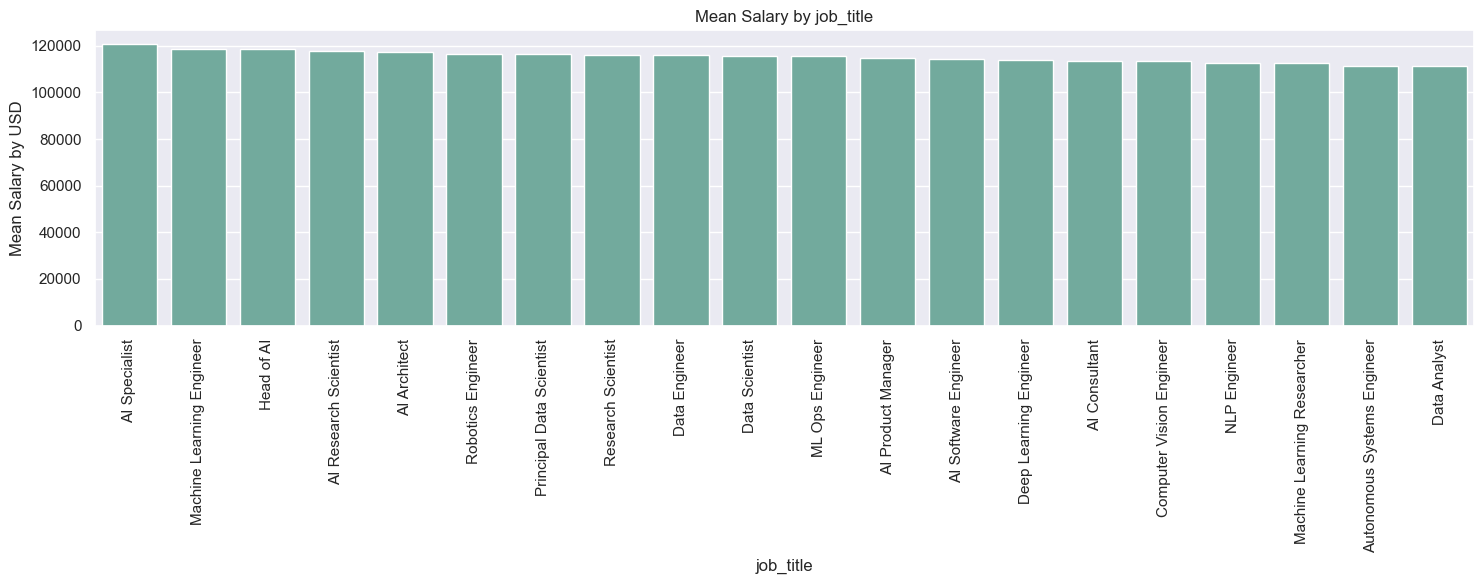

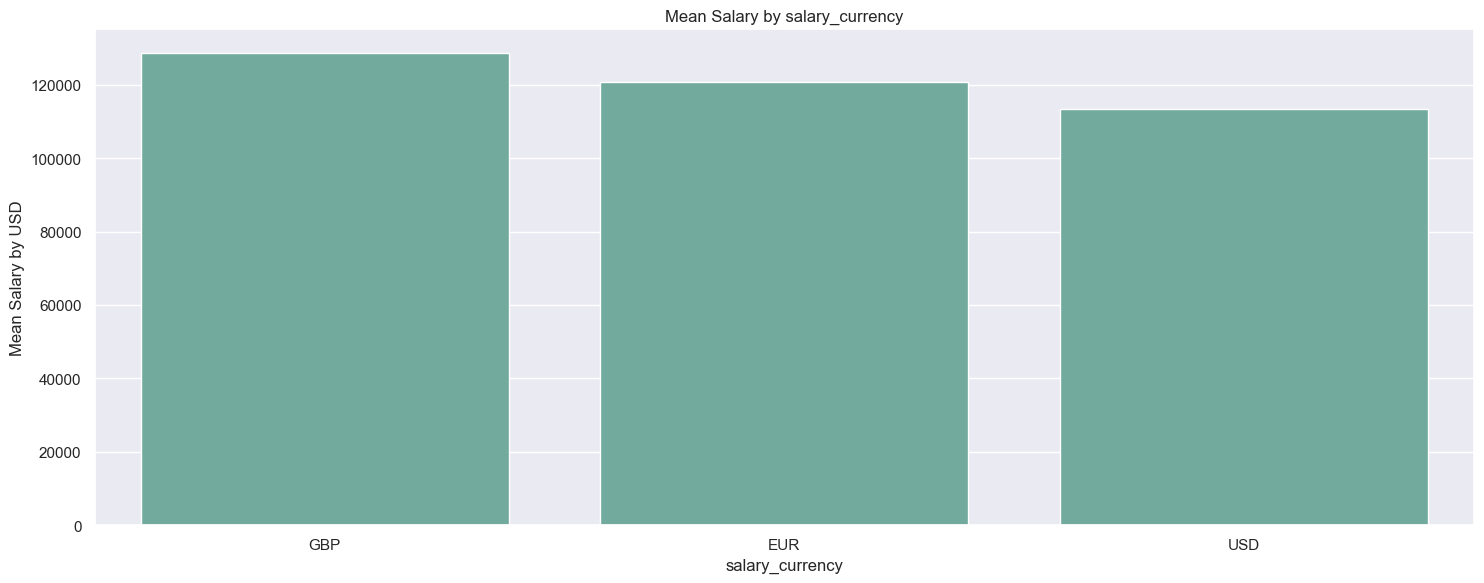

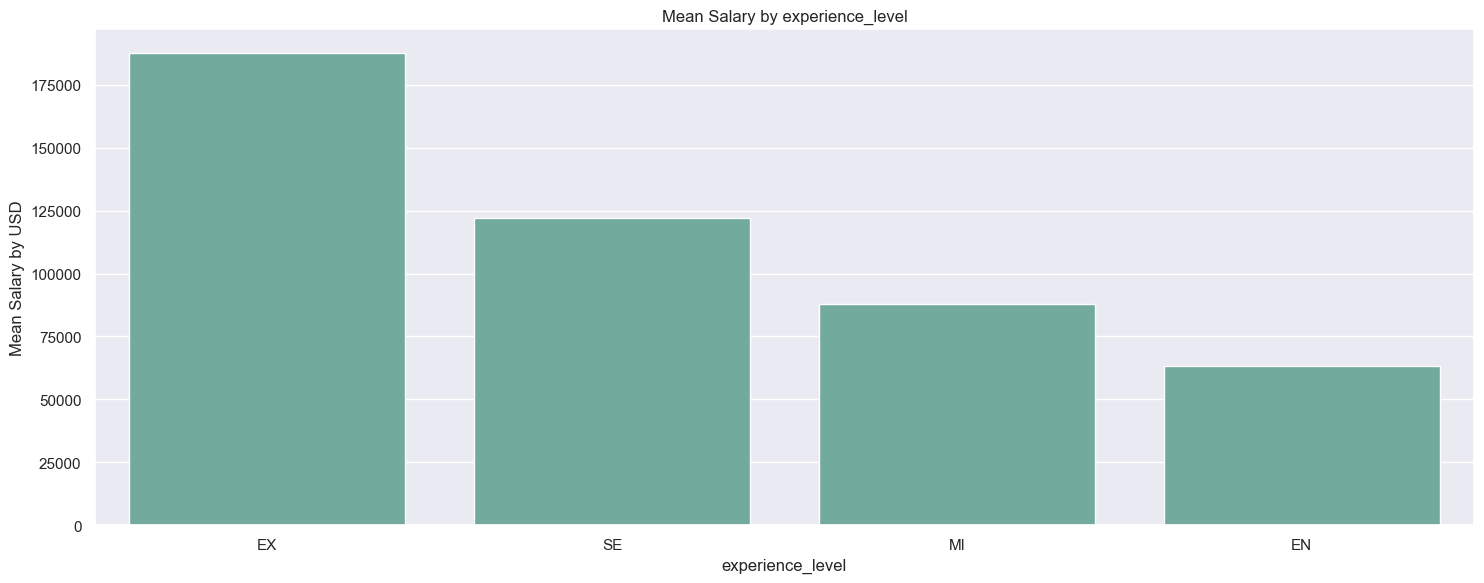

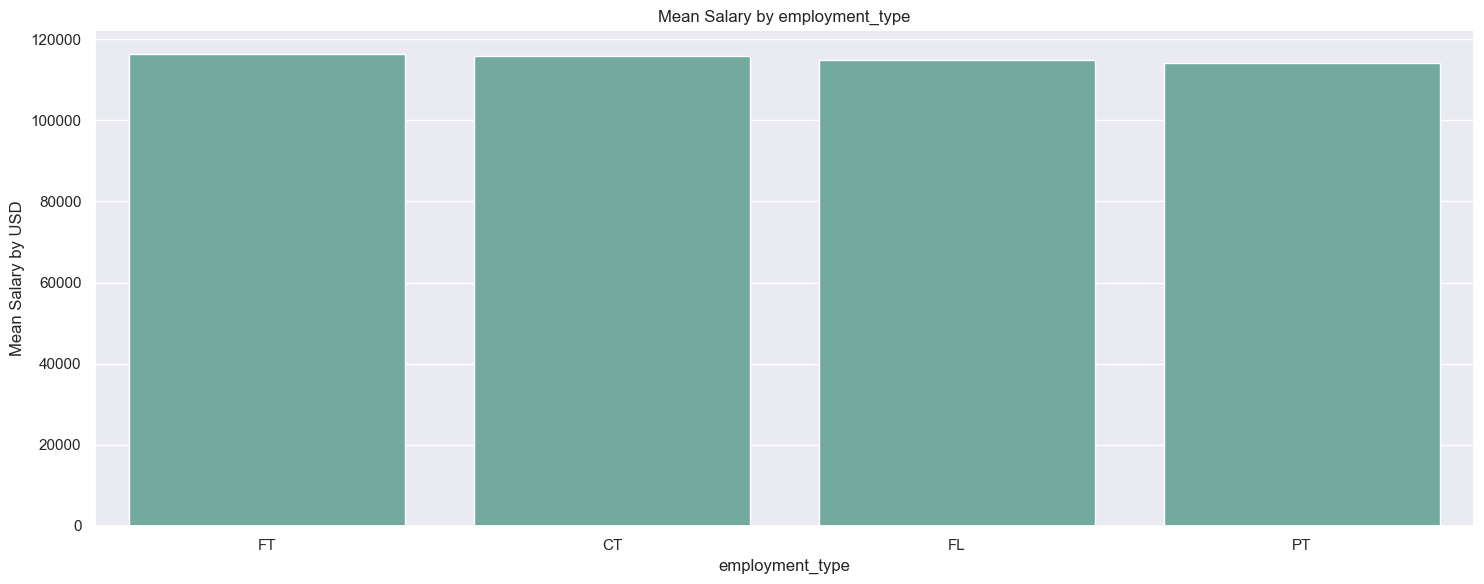

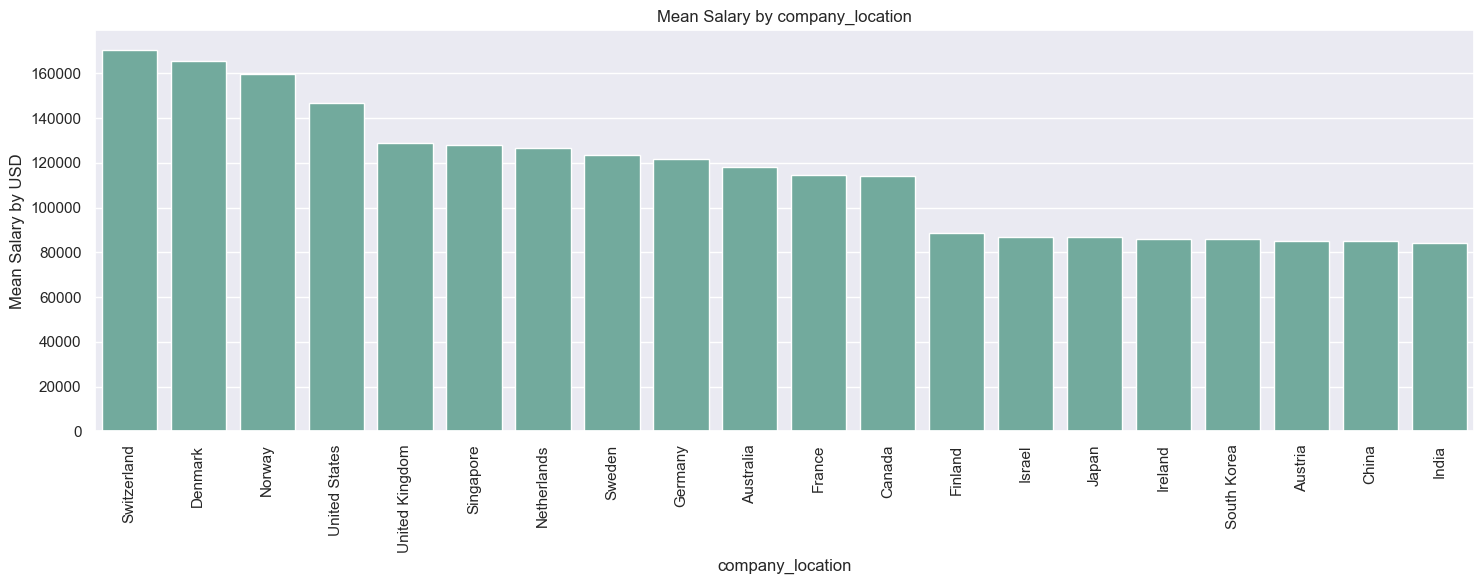

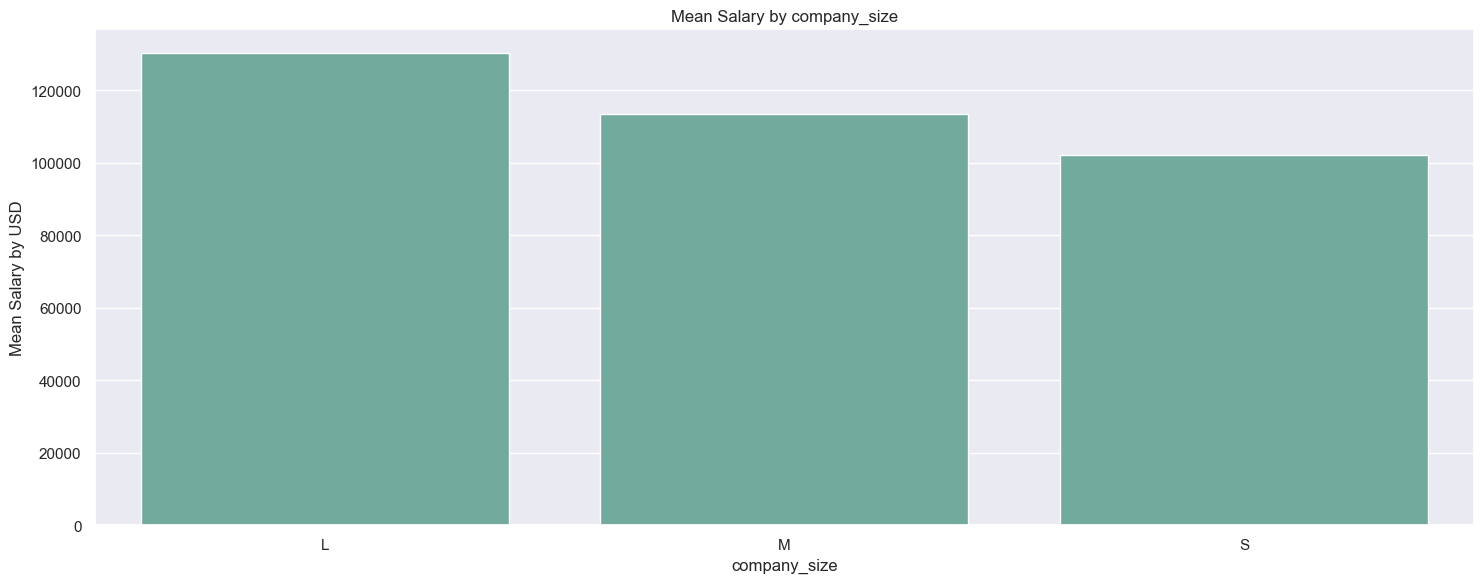

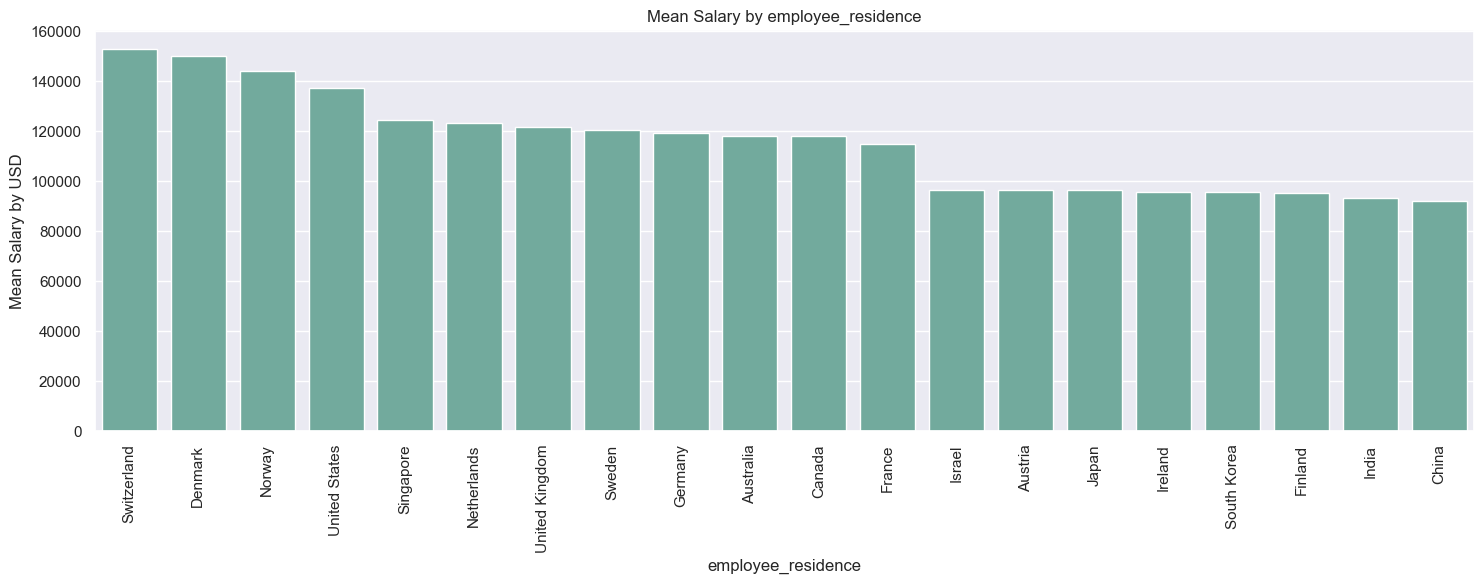

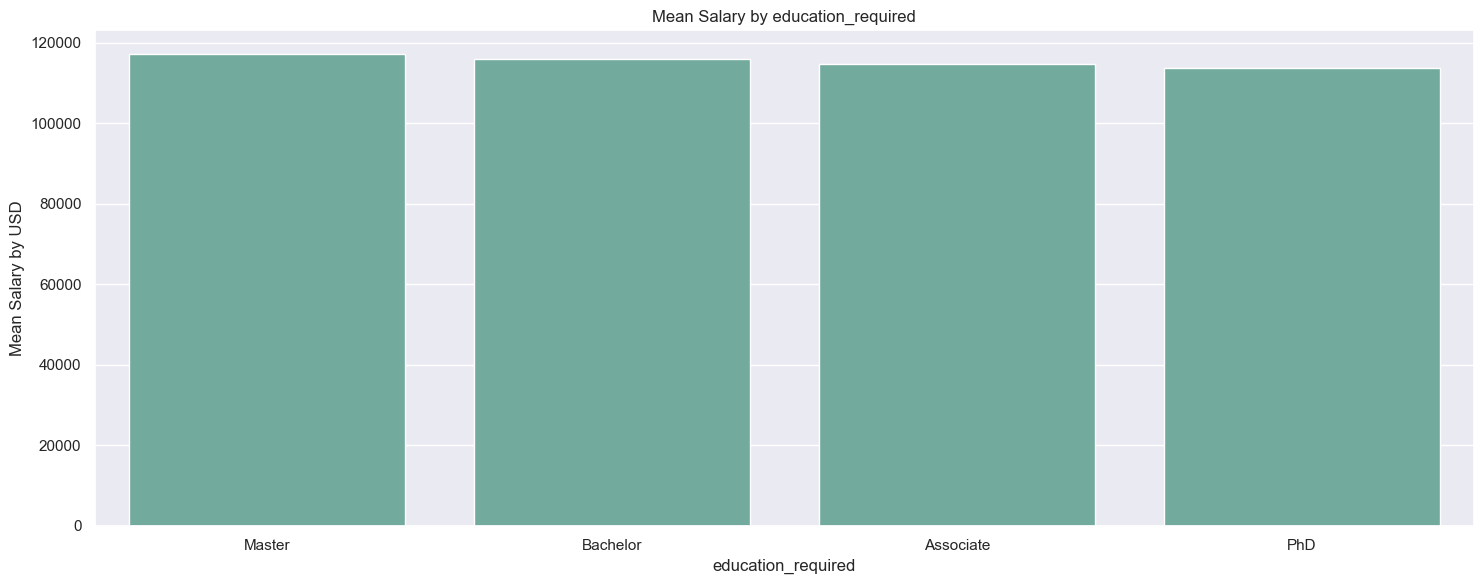

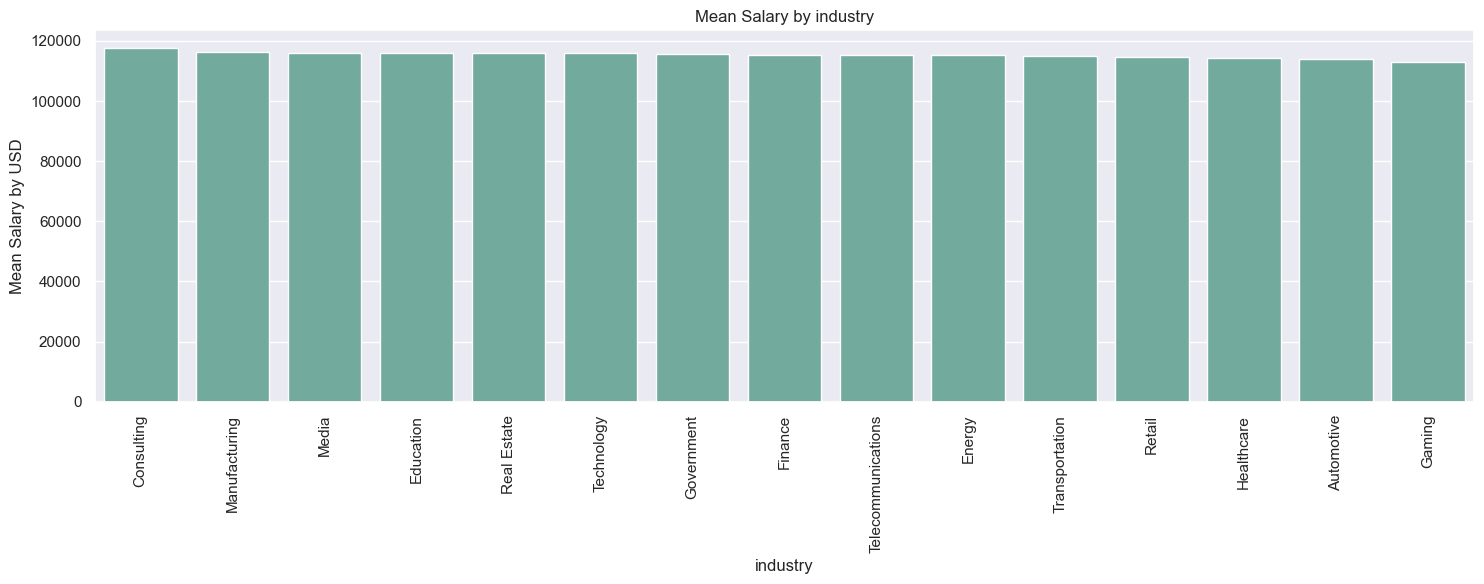

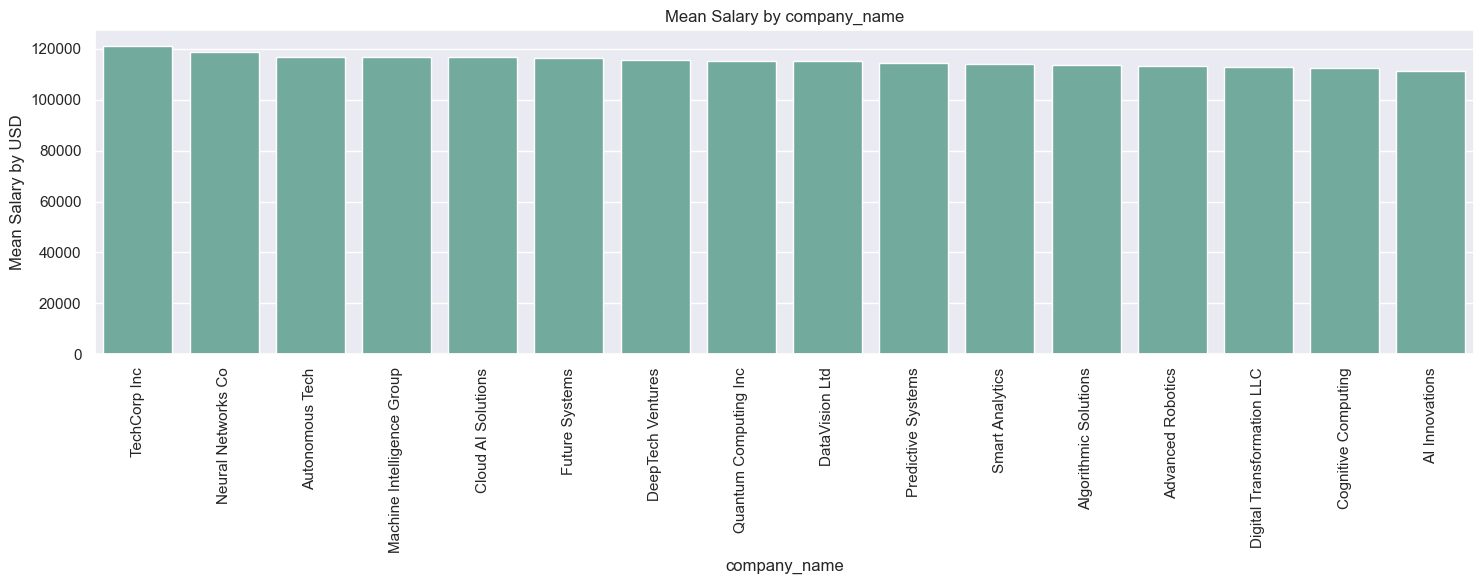

In [371]:
# Categorical Feature, barplot by target
for col in categorical_cols:
    if col != 'required_skills':
        if col == 'job_title' or col == 'company_location' or col == 'employee_residence' or col == 'industry' or col == 'company_name':
            plt.figure(figsize=(15,6))
            sns.barplot(data=df.groupby(col)['salary_usd'].mean().sort_values(ascending=False).reset_index(), x=col, y='salary_usd', color='#69b3a2')
            plt.title(f'Mean Salary by {col}')
            plt.xlabel(col)
            plt.ylabel('Mean Salary by USD')
            plt.xticks(rotation=90)
            plt.tight_layout()
        else:
            plt.figure(figsize=(15,6))
            sns.barplot(data=df.groupby(col)['salary_usd'].mean().sort_values(ascending=False).reset_index(), x=col, y='salary_usd', color='#69b3a2')
            plt.title(f'Mean Salary by {col}')
            plt.xlabel(col)
            plt.ylabel('Mean Salary by USD')
            plt.tight_layout()

- If you are an AI specialist in Switzerland working full-time in a large company in Consulting Industry, you are in good shape brother.
- Jokes aside, job title seems not differ that much in term of mean, thus proving you can just do anything that you like.
- Determinants of differentiation are: **Experience Level**, **Company Location**, and **Company Sizes**. Pursuing for a Master Degree with a debt in your name seems does not help you improve your cut that much.
- Switzerland, Denmark, Norway, and US are very generous with salary. Hence looking for a full-time work here seems like the best choice. That is also the reason why employee residence for these countries are also high. We should consider that these 2 features may correlate.

I will test their correlation score using Cramer's V test.

**V = √(χ² / (n * (min(r, c) - 1)))**

Calculate the chi-square statistic (χ²) from your contingency table data.

Determine the total number of observations (n).

Identify the minimum number of rows or columns (min(r, c)).

Divide the chi-square statistic (χ²) by the product of the sample size (n) and (min(r, c) - 1).

Take the square root of the result. 

In [372]:
# Correlation check
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2_corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))  # Bias correction
    r_corr = r - ((r-1)**2)/(n-1)
    k_corr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2_corr / min((k_corr-1), (r_corr-1)))
cramers_v(df['company_location'], df['employee_residence'])

np.float64(0.7012801903840702)

A score of 0.7 signs for a high correlation. Hence we could drop one

In [373]:
df.groupby('job_title')['salary_usd'].mean().sort_values(ascending=False)

job_title
AI Specialist                  120570.758242
Machine Learning Engineer      118827.919689
Head of AI                     118542.968627
AI Research Scientist          117897.925926
AI Architect                   117436.513619
Robotics Engineer              116470.793149
Principal Data Scientist       116305.219346
Research Scientist             116066.502695
Data Engineer                  115970.720961
Data Scientist                 115819.008333
ML Ops Engineer                115431.335172
AI Product Manager             114680.909825
AI Software Engineer           114273.201531
Deep Learning Engineer         113725.632312
AI Consultant                  113671.870739
Computer Vision Engineer       113472.707182
NLP Engineer                   112670.937008
Machine Learning Researcher    112621.747525
Autonomous Systems Engineer    111396.557272
Data Analyst                   111321.180501
Name: salary_usd, dtype: float64

- AI Specialist (120,570), Machine Learning Engineer (118,827), and Head of AI (118,542) are the top 3 highest paid positions.
- For niche fields, Robotics Engineer (116,470), Deep Learning Engineer (113,725), Computer Vision Engineer (113,472), NLP (112,670).
- Data Analyst is lowest (111,321).
- This table is also explainable, since specific job title ties to level of experience acquired for that role, hence the high salaries.

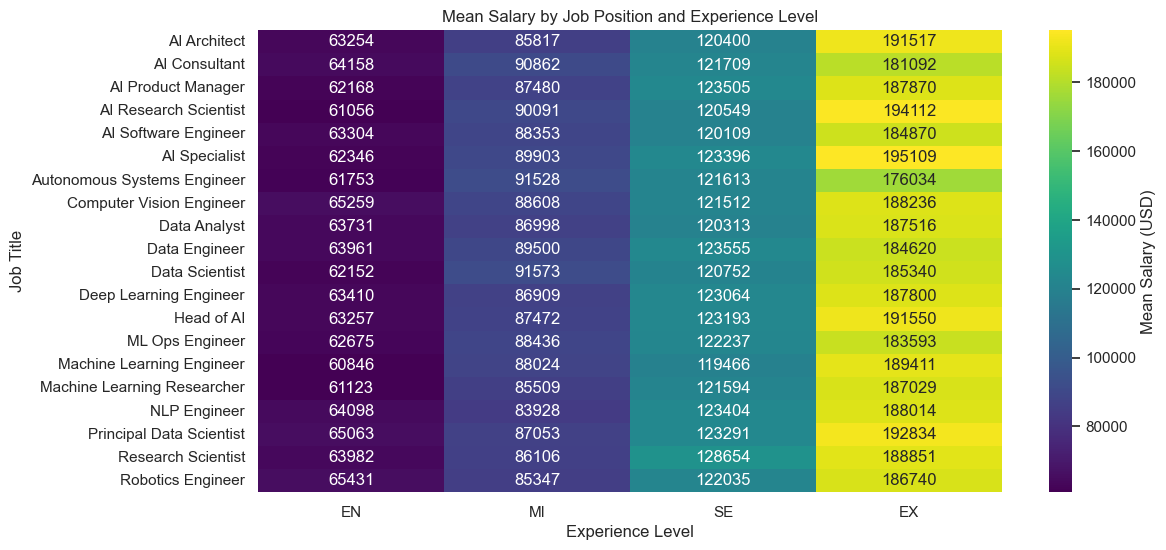

In [374]:
order = ['EN', 'MI', 'SE', 'EX']
_ = df.pivot_table(index='job_title', columns='experience_level', values='salary_usd')
_ = _.reindex(columns=order)
plt.figure(figsize=(12,6))
sns.heatmap(_, annot=True, fmt='.0f', cmap='viridis', cbar_kws={'label': 'Mean Salary (USD)'})
plt.title('Mean Salary by Job Position and Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Job Title')
plt.show()

- **Entry-level**: AI Consultant, AI Software Engineer, Computer Vision Engineer, NLP Engineer, and Robotics Engineer are among the highest paid. There is a pattern here. For these roles, they share the same requirements of technical expertises in the role more.
- **Mid-level**: AI Consultant, AI Research Scientist, Autonomous System Engineer, Data Scientist are more appreciated with higher paid.
- **Senior**: Research Scientist, Data Engineer, AI Product Manager, NLP Engineer, AI Specialist, Principal Data Scientist, Head of AI, and Deep Learning Engineer share similar position in the top, however, we see some quite increase in roles that require business expertise, leading expertise, or just managerial skill in general.
- **Executive**: AI Specialist, AI Research Scientist, Principal Data Scientist, Head of AI, AI Architect are the top positions.

&#8594; Considering your position and experience level, you can see what your expected salary is.

Let's go further into considering: Employment Type and Experience Level

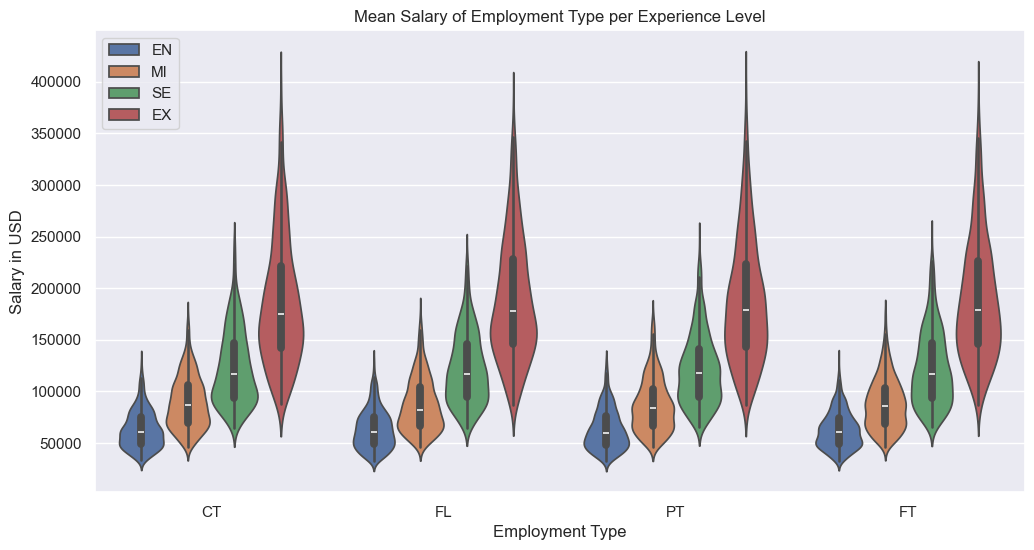

In [375]:
plt.figure(figsize=(12,6))
ax = sns.violinplot(data=df, x='employment_type', y='salary_usd', hue='experience_level', hue_order=order)
plt.xlabel('Employment Type')
plt.ylabel('Salary in USD')
plt.title('Mean Salary of Employment Type per Experience Level')
ax.legend(loc='upper left')
plt.show()

In [376]:
# Pivot Table for Employment Type and Experience Level
df.pivot_table(index='employment_type', columns='experience_level', values='salary_usd', sort=True)

experience_level,EN,EX,MI,SE
employment_type,,,,
CT,63221.230263,185900.902413,89314.441836,122769.690968
FL,63475.635556,188302.247826,87075.804000,122181.734542
FT,62711.216187,188968.650052,88444.976190,122611.745436
PT,63141.913133,187729.952381,87035.918478,121132.554566


There is not a distinct difference among the combinations.

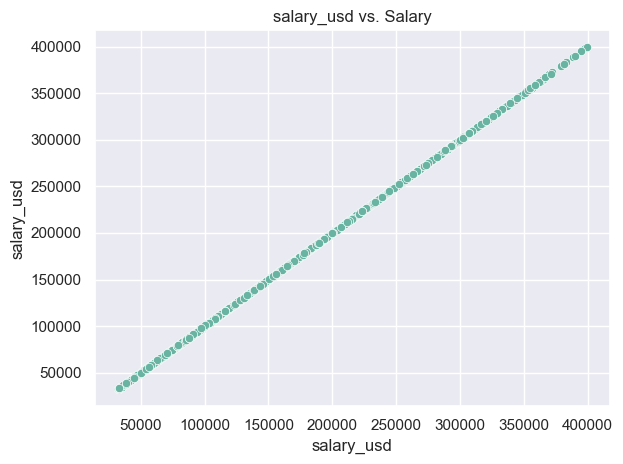

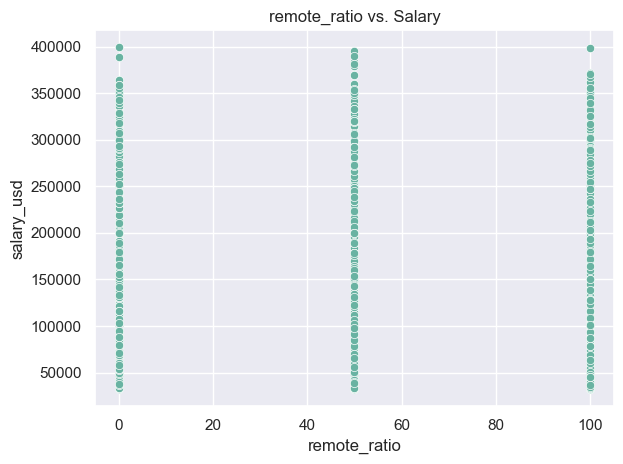

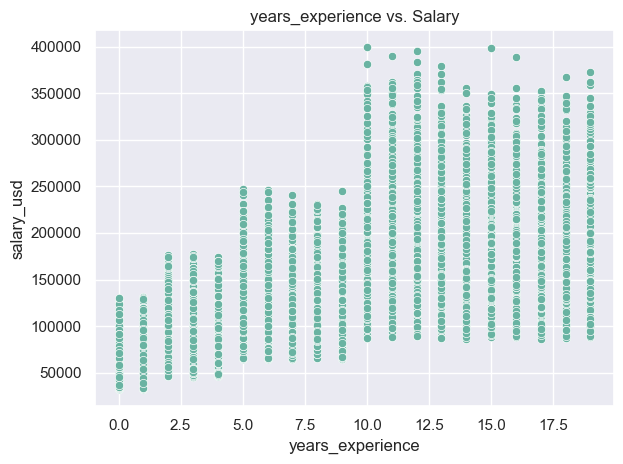

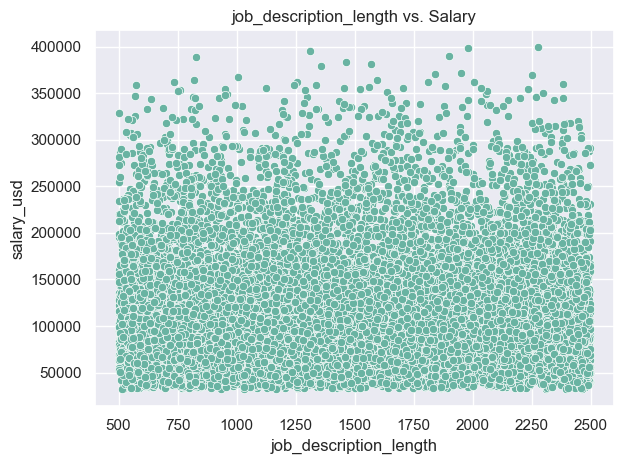

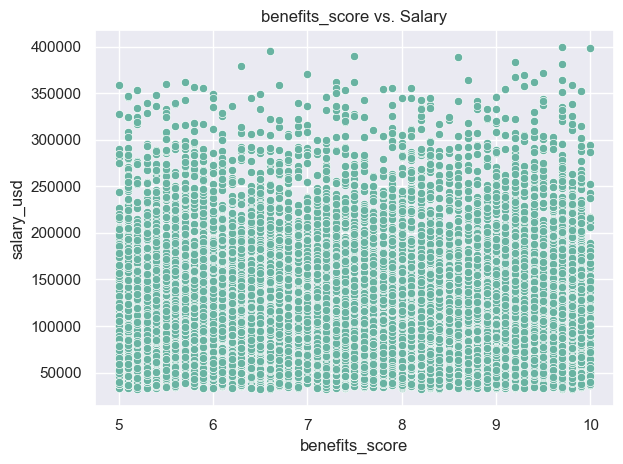

In [377]:
# Numerical Features
for col in numerical_cols:
    # Histplot
    sns.scatterplot(data=df, x=col, y='salary_usd', color='#69b3a2')
    plt.title(f'{col} vs. Salary')
    plt.tight_layout()
    plt.show()

- Job Description and Benefit Score are the ones that have no patterns. We may consider it weak predictors.
- Years of Experience shows a linear trend. Can create a heatmap to display its correlation.

### Correlation

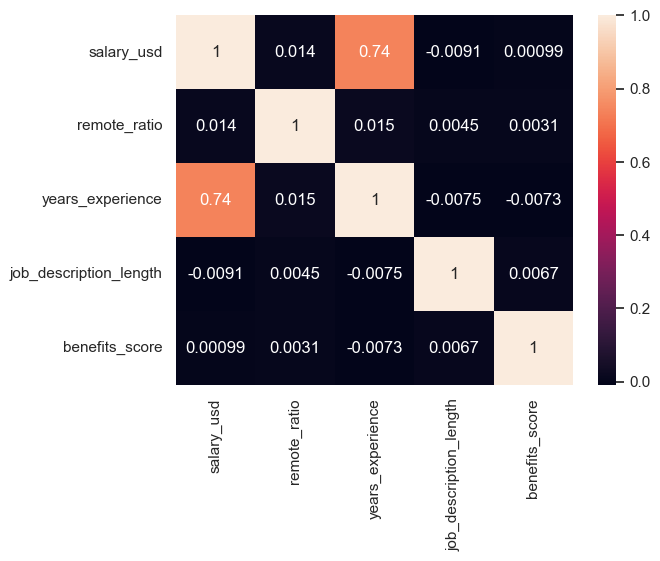

In [378]:
sns.heatmap(df[numerical_cols].corr(), annot=True)
plt.show()

- A score of 0.74 correlation with target signs to the most important feature for our model.

Lastly, let's look at the Year Posted of the listing. Note that the most recent posting is 30/4/2025. The data spans from 01/01/2024.

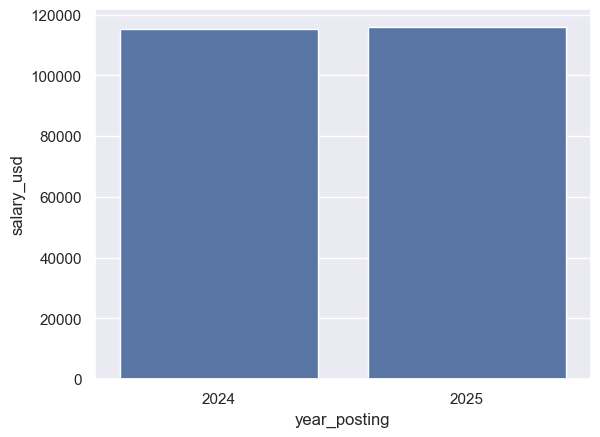

In [379]:
sns.barplot(data=df.groupby('year_posting')['salary_usd'].mean())
plt.show()

In [380]:
df.groupby('year_posting')['salary_usd'].mean()

year_posting
2024    115145.355983
2025    115977.999727
Name: salary_usd, dtype: float64

Up to recently, the mean salary does not change much.

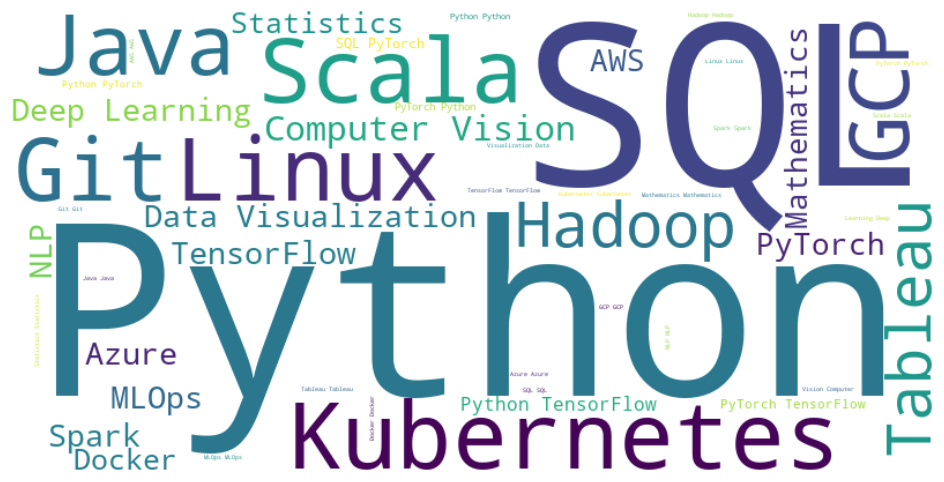

In [381]:
# Most popular skills
all_skills = ','.join(df['required_skills'])
text = all_skills.replace(',', ' ')
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

- Python is still essentially the dominating language for this field, along with SQL, Linux, Scala, Git, Kubernetes as necessary skills

In [382]:
df.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name,month_posting,year_posting,log_salary_usd
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics,10,2024,11.411745
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc,11,2024,11.033211
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech,3,2025,11.935752
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems,12,2024,11.292478
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics,4,2025,10.908247


In [383]:
# Custom class for day of week and month of year, using Cyclical Encoding due to its circular nature
class CyclicalEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, columns, max_vals):
        self.columns = columns
        self.max_vals = max_vals
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.copy()
        for col, max_val in zip(self.columns, self.max_vals):
            X[col + '_sin'] = np.sin(2 * np.pi * X[col] / max_val)
            X[col + '_cos'] = np.cos(2 * np.pi * X[col] / max_val)
            X.drop(columns=[col], inplace=True)
        return X

In [384]:
df['required_skills_split'] = df['required_skills'].str.split(',')

mlb = MultiLabelBinarizer()
required_skills = mlb.fit_transform(df['required_skills_split'])
rs_df = pd.DataFrame(required_skills, columns=mlb.classes_)

df = df.drop(columns=['required_skills', 'required_skills_split'], axis=1).join(rs_df)

In [385]:
df.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name,month_posting,year_posting,log_salary_usd,AWS,Azure,Computer Vision,Data Visualization,Deep Learning,Docker,GCP,Git,Hadoop,Java,Kubernetes,Linux,MLOps,Mathematics,NLP,PyTorch,Python,R,SQL,Scala,Spark,Statistics,Tableau,TensorFlow,AWS,Azure,Computer Vision,Data Visualization,Deep Learning,Docker,GCP,Git,Hadoop,Java,Kubernetes,Linux,MLOps,Mathematics,NLP,PyTorch,Python,R,SQL,Scala,Spark,Statistics,Tableau,TensorFlow
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics,10,2024,11.411745,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc,11,2024,11.033211,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech,3,2025,11.935752,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems,12,2024,11.292478,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics,4,2025,10.908247,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [386]:
# List for future reference
features = df.drop(columns=['salary_usd', 'log_salary_usd', 'job_id', 'employee_residence', 'posting_date', 'application_deadline', 'year_posting']).columns.tolist()
target = 'log_salary_usd'
ohe_cols = ['job_title', 'employment_type', 'company_location', 'industry', 'company_name']
ord_cols = ['experience_level', 'company_size', 'education_required']
ord_order = [['EN', 'MI', 'SE', 'EX'], ['S', 'M', 'L'], ['Associate', 'Bachelor', 'Master', 'PhD']]
cyclical_cols = ['month_posting']
cyclical_vals = [12]
numerical_cols.remove('salary_usd')

In [387]:
num_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ]
)

ohe_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(handle_unknown='ignore'))
    ]
)

ord_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ord', OrdinalEncoder(categories=ord_order))
    ]
)

cyclical_pipeline = Pipeline(
    steps=[
        ('cyclical', CyclicalEncoder(columns=cyclical_cols, max_vals=cyclical_vals))
    ]
)

In [388]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, numerical_cols),
        ('ohe', ohe_pipeline, ohe_cols),
        ('ord', ord_pipeline, ord_cols),
        ('cyclical', cyclical_pipeline, cyclical_cols)
    ]
)


In [389]:
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Modeling

In [390]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=42),
    'RandomForestRegressor': RandomForestRegressor(random_state=42),
    'Ridge': Ridge(random_state=42),
    'Lasso': Lasso(random_state=42),
    'Elastic Net': ElasticNet(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGB': XGBRegressor(),
    'SVR': SVR()
}


In [391]:
rmse_mean = {}
rmse_std = {}

In [392]:
for name, model in models.items():
    pipe = Pipeline(
        steps=[
            ('preprocessor', preprocessor),
            ('model', model)
        ]
    )
    scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse = np.sqrt(-scores)
    mean = np.mean(rmse)
    std = np.std(rmse)
    rmse_mean[name] = float(round(mean, 5))
    rmse_std[name] = float(round(std, 5))

In [393]:
rmse_mean

{'Linear Regression': 0.14183,
 'Decision Tree Regression': 0.20169,
 'RandomForestRegressor': 0.14928,
 'Ridge': 0.14182,
 'Lasso': 0.49551,
 'Elastic Net': 0.49551,
 'Gradient Boosting': 0.14711,
 'XGB': 0.15007,
 'SVR': 0.15123}

In [394]:
rmse_std

{'Linear Regression': 0.0009,
 'Decision Tree Regression': 0.00209,
 'RandomForestRegressor': 0.00097,
 'Ridge': 0.0009,
 'Lasso': 0.00637,
 'Elastic Net': 0.00637,
 'Gradient Boosting': 0.00083,
 'XGB': 0.00162,
 'SVR': 0.00151}

It seems like Ridge Regression performs best.

In [395]:
# Linear Regression
ridge = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('regressor', Ridge())
    ]
)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
print(f'Ridge Regression: {round(r2_score(y_test, y_pred) * 100, 5)}% correct predictions')

Ridge Regression: 91.84355% correct predictions


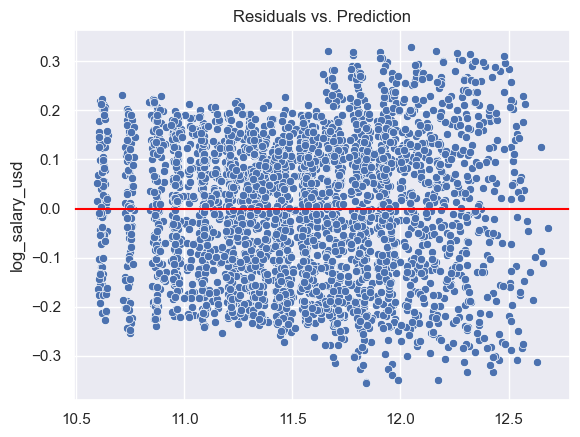

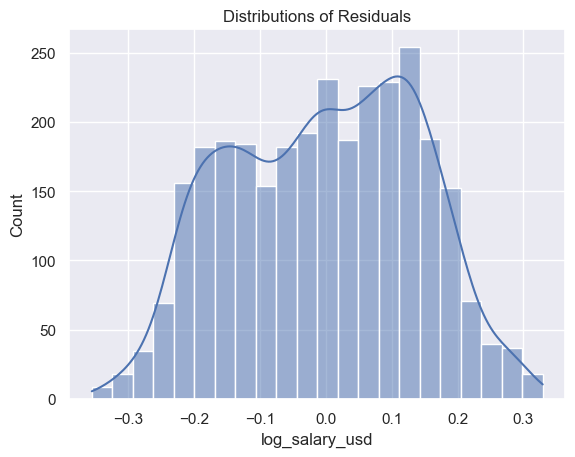

In [396]:
residuals = y_test - y_pred

sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red')
plt.title('Residuals vs. Prediction')
plt.show()

sns.histplot(residuals, kde=True)
plt.title('Distributions of Residuals')
plt.show()